# Seminar 2

In [1]:
import numpy as np
import pandas as pd

import IPython.display as dp
import matplotlib.pyplot as plt
import seaborn as sns

dp.set_matplotlib_formats("retina")
sns.set(style="whitegrid", font_scale=1.5)
sns.despine()

%matplotlib inline

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_40555/3212562443.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  dp.set_matplotlib_formats("retina")


## Recap of counting

Sampling $k$ objects from $n$ choices:

|With replacement|Order matters|Formula|Example|
|:-:|:-:|:-:|:-:|
|Yes|Yes|\begin{eqnarray}n^k\end{eqnarray}|Car plates|
|Yes|No|\begin{eqnarray}\begin{pmatrix}n+k-1\\k\end{pmatrix}\end{eqnarray}|"Stars and bars"|
|No|Yes|\begin{eqnarray}\lfloor n \rfloor_k\end{eqnarray}|Birthday paradox complement numerator|
|No|No|\begin{eqnarray}\begin{pmatrix}n\\k\end{pmatrix}\end{eqnarray}|Bose-Einstein|

Arranging $k$ objects into $n$ boxes:

|With replacement|Objects distinguishable|Formula|
|:-:|:-:|:-:|
|Yes|Yes|\begin{eqnarray}n^k\end{eqnarray}|
|Yes|No|\begin{eqnarray}\begin{pmatrix}n+k-1\\k\end{pmatrix}\end{eqnarray}|
|No|Yes|\begin{eqnarray}\lfloor n \rfloor_k\end{eqnarray}|
|No|No|\begin{eqnarray}\begin{pmatrix}n\\k\end{pmatrix}\end{eqnarray}|

## Inclusion-exclusion formula

Let $C(X)$ be the number of cases when $X$ happens.

$$C\left(\bigcup\limits_{i=1}^n A_i\right) = \sum_i C(A_i) − \sum_{i < j} C(A_i \cap A_j) + \sum_{i < j < k}C(A_i \cap A_j \cap A_k)−\ldots+(−1)^{n+1} C(A_1 \cap\ldots \cap A_n)$$

In [2]:
from matplotlib_venn import venn2, venn3

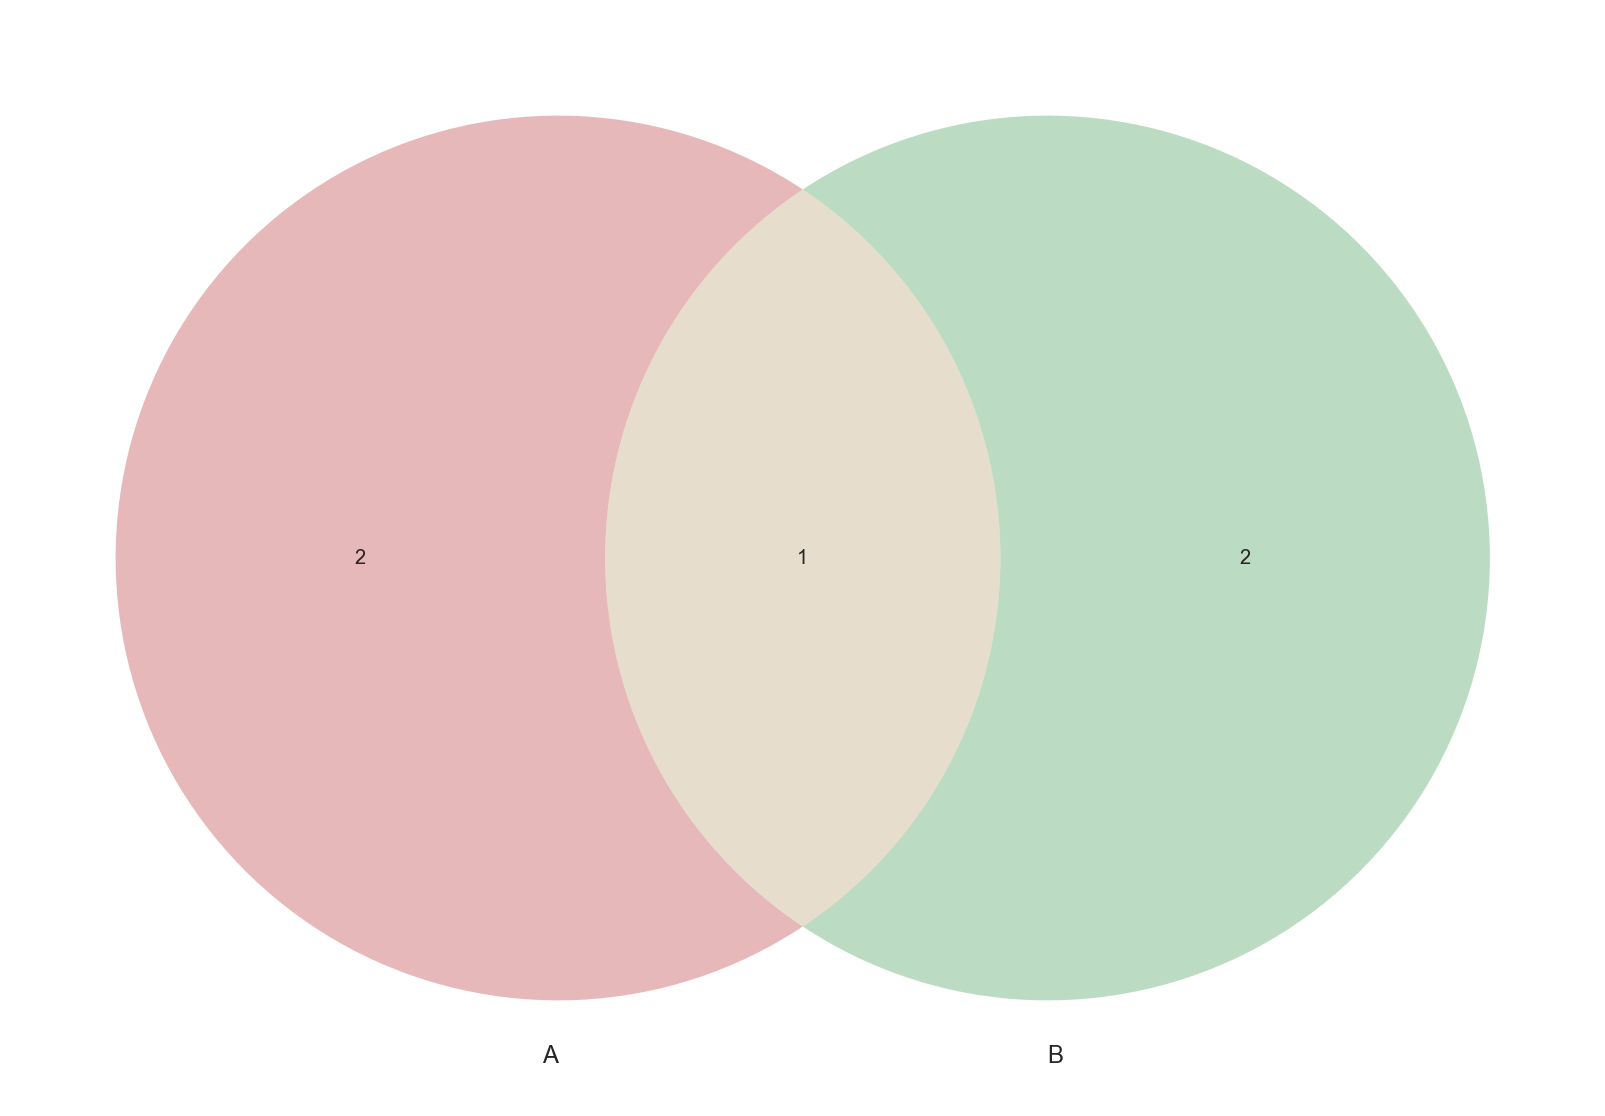

In [3]:
fig, ax = plt.subplots(figsize=(20,10))
venn2(({'A', 'B', 'C'}, {'A', 'D', 'E'}), ax=ax);

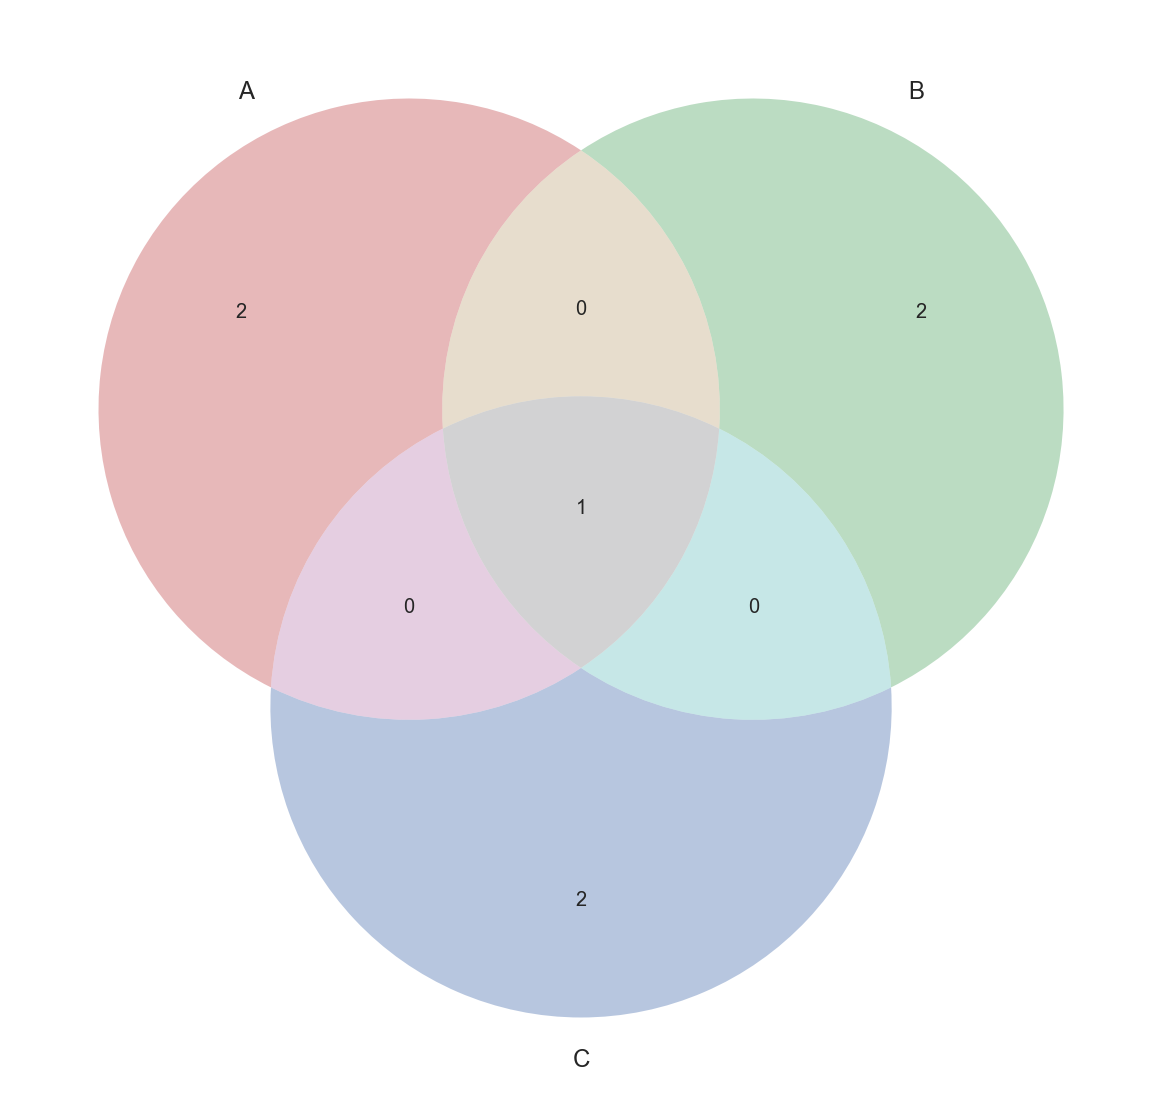

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
venn3(({'A', 'B', 'C'}, {'A', 'D', 'E'}, {'A', "F", "G"}), ax=ax);

$$(3+3+3)-(1+1+1)+1=9-3+1=7$$

## Problem 1

There are 15 chocolate bars and 10 children. In how many ways can the chocolate bars be distributed to the children, in each of the following scenarios?
- The chocolate bars are fungible (interchangeable).
- The chocolate bars are fungible, and each child must receive at least one.
- The chocolate bars are not fungible (it matters which particular bar goes where).
- The chocolate bars are not fungible, and each child must receive at least one. Hint: The strategy suggested in (b) does not apply. Instead, consider randomly giving the chocolate bars to the children, and apply inclusion-exclusion.

## Solution 1.1

The chocolate bars are fungible (interchangeable). Since the children are interchangeable as well, we will be using "stars and bars":

$$|\underbrace{oo}_{\text{child }1}|\underbrace{o}_{\text{child }2}|\underbrace{o}_{\text{child }3}|\ldots|\underbrace{o}_{\text{child }10}|$$

- We have $10-1=9$ bars (separators between children), because left- and right-most bars are fixed
- We have $15$ stars (chocolates)
- Total $9+15=24$ possible object positions

Therefore, we have $\begin{pmatrix}24\\9\end{pmatrix}$ combinations.

There is a different way to arrive at this answer: for each of 15 chocolate bars we are making a decision from 10 children with replacement. The formula from the lecture gives $\begin{pmatrix}10+15-1\\15\end{pmatrix}$, which is the same number.

## Solution 1.2


The chocolate bars are fungible (interchangeable). Since the children are interchangeable as well, we will be using "stars and bars". Let's first lay out all the chocolate bars in a line:

$$oooo\ldots o$$

Next, we need to put the boundaries into their possible positions, but now without replacement (so that boundaries do not coincide leaving a child without his chocolate bar)

$$|\underbrace{oo}_{\text{child }1}|\underbrace{o}_{\text{child }2}|\underbrace{o}_{\text{child }3}|\ldots|\underbrace{o}_{\text{child }10}|$$

- We have $10-1=9$ bars (separators between children), because left- and right-most bars are fixed
- We have $15-1=14$ stars (chocolates) i.e. object positions

Sampling without replacement, we obtain $\begin{pmatrix}14\\9\end{pmatrix}$.

## Solution 1.3

The chocolate bars are not fungible (it matters which particular bar goes where), but the children are still interchangeable. Can't use "stars and bars", though.

For each of 15 chocolate bars we will be selecting one of 10 children who gets it, with replacement of children. The formula from the lecture gives us: $10^{15}$.

## Solution 1.4

The chocolate bars are not fungible, and each child must receive at least one. The children are interchangeable. Can't use "stars and bars". Instead, let's apply inclusion-exclusion. From the previous subproblem, the number of all possible combinations is $10^{15} = \begin{pmatrix}10\\0\end{pmatrix} 10^{15}$.

Next, let's count how many cases are there, when exactly one child has no chocolate bar. Denote $A_{i}$ the event that child $i$ does not get a chocolate bar. The number of such combinations is $N(A_i) = \begin{pmatrix}10\\1\end{pmatrix}9^{15}$.

Next, let's count how many cases are there, when exactly two children have no chocolate bar: $N(A_i \cap A_j) = \begin{pmatrix}10\\2\end{pmatrix}8^{15}$.

See the pattern? Now we need to apply inclusion-exclusion formula. The final number of combinations is:
$$
\sum_{k=0}^{10} (-1)^k \begin{pmatrix}10\\k\end{pmatrix} (10-k)^{15}
$$

## Problem 2

What is the number of all subsets of a set with $N$ elements?

## Solution 2

Denote our set $A = \{a_1, a_2, \ldots, a_N\}$. Now let's create a subset $B \subset A$. For every element $a_i$, let's choose if we will include it into subset ($1$) or not ($0$). How many combinations of zeros and ones are there then?

Using ordered sampling with replacement, we obtain $2^N$ combinations.

# Naive probability
## Sample spaces

The sample space $S$ of an experiment is ...

... the set of all possible outcomes of the experiment. An event $A$ is a subset of the sample space $S$.

## Naive definition of probability

Let $A$ be an event for an experiment with a finite sample space $S$. Naive probability of A is ...

... number of outcomes favorable to $A$ divided by the total number of outcomes in $S$.

$$
\mathbb{P}(A) = \frac{|A|}{|S|} = \frac{\text{# of outcomes favorable to } A}{\text{total # of outcomes in } S}
$$

## Problem 3
A city with 6 districts has 6 robberies in a particular week. Assume the robberies are located randomly, with all possibilities for which robbery occurred where equally likely. What is the probability that some district had more than 1 robbery?

## Solution 3

We will compute the probability of the complement.

- All cases: There are $6^6$ possible configurations for which robbery occurred where.
- Favorable cases: There are $6!$ configurations where each district had exactly 1 of the 6.

So the probability of the complement of the desired event is $6!/6^6$.

Finally, the probability of some district having more than 1 robbery is $1 - 6!/6^6$.

In [5]:
from scipy.special import factorial
1 - factorial(6) / (6 ** 6)

0.9845679012345679

## Problem 4
Each of $n$ balls is independently placed into one of $n$ boxes, with all boxes equally likely.
What is the probability that exactly one box is empty?

## Solution 4

Reformulate: one box empty means one box has two balls.

- All cases: $n^n$ (why?)
- Favorable cases:
    - Choose empty box: $\begin{pmatrix}n\\1\end{pmatrix}$
    - Choose box with two balls: $\begin{pmatrix}n-1\\1\end{pmatrix}$
    - Choose two balls: $\begin{pmatrix}n\\2\end{pmatrix}$
    - Permutations of the rest balls: $(n-2)!$
    
Overall:
$$
\frac{\begin{pmatrix}n\\1\end{pmatrix}\begin{pmatrix}n-1\\1\end{pmatrix}\begin{pmatrix}n\\2\end{pmatrix}(n-2)!}{n^n} = \frac{\begin{pmatrix}n\\2\end{pmatrix} n!}{n^n}
$$

## Problem 5

There are 100 passengers lined up to board an airplane with 100 seats (with each seat assigned to one of the passengers). The first passenger in line crazily decides to sit in a randomly chosen seat (with all seats equally likely). Each subsequent passenger takes their assigned seat if available, and otherwise sits in a random available seat. What is the probability that the last passenger in line gets to sit in their assigned seat?

## Solution 5

Denote $i$-th passenger true seat as $i$, regardless of its position in the plane.

Next, notice that if any passenger $j$ sits into seat $1$, it means that his place $j$ is taken. Such case therefore removes the source of permutation. After that, all the passengers that enter the plane will be able to sit in their true seats. It is important that it always happens and can happen with any passenger $j$.

Generally, the last $100$-th passenger may observe two cases:
- The premutation was removed, then he has the option to sit into his true $100$-th seat
- The permutation was not removed, then he is the one to remove the permutation and take seat $1$.

We can now reduce the problem to just two seats: $1$-st and $100$-th. One of the passengers seating on these seats is the last $100$-th passenger, the other is any other passenger $j$.

Since $j<100$, it means that both $1$-st and $100$-th seats were empty when he or she boarded the plane! And the probabilities to sit in any of them is equal.

If $j$ sat in $1$ then the last passenger ended up sitting in $100$ and the resulting configuration of passengers sitting in the 100 seats is the same as if $j$ had sat in $100$ except for the fact that the passengers in $1$ and $100$ are swapped. Therefore these two configurations occur with the same probability and exactly one of them has the last passenger in his or her seat $100$.

This implies that all the final configurations of passengers can be paired such that the two configurations in any pair occur with the same probability and exactly one has the last passenger in his or her seat.

This implies that the probability that the last passenger is in her seat is $0.5$.

## Non-naive definition

### Definition

A probability space consists of a sample space $S$ and a probability function $P$ which takes an event $A \subseteq S$ as input and returns $P(A)$, a real number between $0$ and $1$, as output. The function $P$ must satisfy the following axioms:
- $P(\varnothing) = 0, P(S) = 1$
- If $A_1, A_2, \ldots$ are disjoint ($A_i \cap A_j = \varnothing, i \neq j$) events, then
    $$
    P\left(\bigcup\limits_{j=1}^\infty A_j\right) = \sum\limits_{j=1}^\infty P(A_j)
    $$

### Properties

1. $P(A^c) = 1 − P(A)$
2. If $A \subseteq B$, then $P(A) \leqslant P(B)$
3. $P (A \cup B) = P (A) + P (B) − P (A \cap B)$

## Problem 6

Consider set $S$ of all (how many?) subsets of set $M = \{1, \ldots, N\}$. We take two sets randomly and independently two sets $A, B \in S$. Find the probability that $A \cap B = \varnothing$.

## Solution 6

Take any element $e \in M$ from the original set.

- $\mathbb{P}(e \in A) = p_1 = \tfrac12$, by construction of $A$
- $\mathbb{P}(e \in B) = p_2 = \tfrac12$, by construction of $B$
- $\mathbb{P}(e \in A \cap B) = p_{12} = p_1 \cdot p_2 = \tfrac14$
- $\mathbb{P}(e \notin A \cap B) = 1 - \mathbb{P}(e \in A \cap B) = 1 - p_{12} = \tfrac34$

Repeat for every $e \in M$ to obtain:
$$
\mathbb{P}(A \cap B = \varnothing) = \left( \frac34 \right)^N
$$

## Inclusion-exclusion formula

$$P (A \cup B) = P (A) + P (B) − P (A \cap B)$$

$$P\left(\bigcup\limits_{i=1}^n A_i\right) = \sum_i P(A_i) − \sum_{i < j} P(A_i \cap A_j) + \sum_{i < j < k}P(A_i \cap A_j \cap A_k)−\ldots+(−1)^{n+1} P(A_1 \cap\ldots \cap A_n)$$

## Problem 7
A fair dice is rolled $n$ times. What is the probability that at least 1 of the 6 values never appears?

## Solution 7

Let $A_i$ be the event that $i$-th value does not appear. Then, $\bigcup\limits_{i=1}^6 A_i$ is the event that at least one values does not appear. Let $B_{ij}$ be the event that $i$-th value does not appear on $j$-th roll. Then,
$$
P(A_i) = \prod\limits_{j=1}^n P(B_{ij}) = \left(P(B_{i1})\right)^n = \left( \frac56 \right)^n
$$

Now, in order to use the inclusion-exclusion formula, we will need the probabilities of intersections. To get those, consider the probability of the event $A_i \cap A_j$, i.e. that values $i$ and $j$ did not appear:
$$
P(A_i \cap A_j) = \left( \frac46 \right)^n
$$

Finally, consider the fact that the values are free to be any of the six, so we need to **choose** them. Then,
$$
P\left(\bigcup\limits_{i=1}^n A_i\right) = \begin{pmatrix} 6\\1 \end{pmatrix} \left( \frac56 \right)^n - \begin{pmatrix} 6\\2 \end{pmatrix} \left( \frac46 \right)^n + \begin{pmatrix} 6\\3 \end{pmatrix} \left( \frac36 \right)^6 - \begin{pmatrix} 6\\4 \end{pmatrix} \left( \frac26 \right)^n + \begin{pmatrix} 6\\5 \end{pmatrix} \left( \frac16 \right)^n - \begin{pmatrix} 6\\6 \end{pmatrix} \left( \frac06 \right)^n
$$